# CAS BDAI Individual Innovation Project: Tennis Match Predictor

## Table of Contents 
1. [Introduction](#introduction)
2. [Preliminary steps](#preliminary-steps)
3. [ ](# )
4. [ ](# )
5. [ ](# )
6. [ ](# )
7. [ ](# )
8. [ ](# )


## Introduction <a name="introduction"></a>

### Tennis Match Predictor: GAImeSetMatch

### Goal of this project

### Steps to implement
1. Load and explore the data
2. Data processing and cleaning
3. Feature Engineering
    - Surface win %
    - Tournament level win %
    - Head-to-head
    - Recent form
4. Data Analysis
5. Prediction


![.png](img/project/image.png)

Image source: [something](https://example.com/)

## Preliminary steps <a name="preliminary-steps"></a>

### Set the path to the interpreter (OPTIONAL - skip if using Google Colab; modify if using local dev environment )

In [430]:
#!/home/jean/Documents/dev/cas-project/venv_proj/bin/python3

### Import the dependencies
We need to import the required libraries.

In [431]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import re
%matplotlib inline

### Set static parameters
Here we set some parameters which won't be changed. This allows for more easy handling and viewing of the data being explored.

In [432]:
# first, set some static parameters and options (used later too for loading other files)

# directory containing the .csv files
DIRNAME = 'data'

# set options for pandas viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.reset_option('display.float_format')

### Define some helper functions and datasets
These will help us later with common tasks.

#### Sample data 5 observations

In [433]:

# Small sample dataframe (5 matches) for misc usage
sample_matches_df = pd.DataFrame(data = {
    'tourney_id': ['2000-301', '2000-301', '2000-301', '2000-301', '2000-301'],
    'tourney_name': ['Auckland', 'Auckland', 'Auckland', 'Auckland', 'Auckland'],
    'surface': ['Hard', 'Hard', 'Hard', 'Hard', 'Hard'],
    'draw_size': [32, 32, 32, 32, 32],
    'tourney_level': ['A', 'A', 'A', 'A', 'A'],
    'tourney_date': [20000110, 20000110, 20000110, 20000110, 20000110],
    'match_num': [1, 2, 3, 4, 5],
    'winner_id': [103163, 102607, 103252, 103507, 102103],
    'winner_seed': [1.0, None, None, 7.0, None],
    'winner_entry': [None, 'Q', None, None, 'Q'],
    'winner_name': ['Tommy Haas', 'Juan Balcells', 'Alberto Martin', 'Juan Carlos Ferrero', 'Michael Sell'],
    'winner_hand': ['R', 'R', 'R', 'R', 'R'],
    'winner_ht': [188.0, 190.0, 175.0, 183.0, 180.0],
    'winner_ioc': ['GER', 'ESP', 'ESP', 'ESP', 'USA'],
    'winner_age': [21.7, 24.5, 21.3, 19.9, 27.3],
    'loser_id': [101543, 102644, 102238, 103819, 102765],
    'loser_seed': [None, None, None, None, 4.0],
    'loser_entry': [None, None, None, None, None],
    'loser_name': ['Jeff Tarango', 'Franco Squillari', 'Alberto Berasategui', 'Roger Federer', 'Nicolas Escude'],
    'loser_hand': ['L', 'L', 'L', 'L', 'L'],
    'loser_ht': [180.0, 183.0, 173.0, 185.0, 185.0],
    'loser_ioc': ['USA', 'ARG', 'ESP', 'SUI', 'FRA'],
    'loser_age': [31.1, 24.3, 26.5, 18.4, 23.7],
    'score': ['7-5 4-6 7-5', '7-5 7-5', '6-3 6-1', '6-4 6-4', '0-6 7-6(7) 6-1'],
    'best_of': [3, 3, 3, 3, 3],
    'round': ['R32', 'R32', 'R32', 'R32', 'R32'],
    'minutes': [108.0, 85.0, 56.0, 68.0, 115.0],
    'w_ace': [18.0, 5.0, 0.0, 5.0, 1.0],
    'w_df': [4.0, 3.0, 0.0, 1.0, 2.0],
    'w_svpt': [96.0, 76.0, 55.0, 53.0, 98.0],
    'w_1stIn': [49.0, 52.0, 35.0, 28.0, 66.0],
    'w_1stWon': [39.0, 39.0, 25.0, 26.0, 39.0],
    'w_2ndWon': [28.0, 13.0, 12.0, 15.0, 14.0],
    'w_SvGms': [17.0, 12.0, 8.0, 10.0, 13.0],
    'w_bpSaved': [3.0, 5.0, 1.0, 0.0, 6.0],
    'w_bpFaced': [5.0, 6.0, 1.0, 0.0, 8.0],
    'l_ace': [7.0, 10.0, 6.0, 11.0, 8.0],
    'l_df': [8.0, 7.0, 6.0, 2.0, 8.0],
    'l_svpt': [106.0, 74.0, 56.0, 70.0, 92.0],
    'l_1stIn': [55.0, 32.0, 33.0, 43.0, 46.0],
    'l_1stWon': [39.0, 25.0, 20.0, 29.0, 34.0],
    'l_2ndWon': [29.0, 18.0, 7.0, 14.0, 18.0],
    'l_SvGms': [17.0, 12.0, 8.0, 10.0, 12.0],
    'l_bpSaved': [4.0, 3.0, 7.0, 6.0, 5.0],
    'l_bpFaced': [7.0, 6.0, 11.0, 8.0, 9.0],
    'winner_rank': [1612.0, 211.0, 48.0, 768.0, 167.0],
    'winner_rank_points': [63.0, 157.0, 726.0, 616.0, 219.0],
    'loser_rank': [595.0, 723.0, 649.0, 616.0, 873.0],
    'loser_rank_points': [None, 723.0, 649.0, 616.0, 873.0]
}
)

## Load and explore the data
This section loads the data available in .csv files from the aforementioned source, explores the data and then cleans it for ease of use and data quality.


### Load matches
Data is available in the form of results of ATP matches. For simplicity reasons, focus only on matches since the year 2000*. Each year is stored in one file using naming convention atp_matches_yyyy.csv.

*The reasoning behind this: since the year 2000, there have been factors that have influenced the outcomes of the modern form of the sport. For me, these are:
1. Racquet technology: Since the 1980s, rackets are made mainly out of graphite. Reference: [Link](https://www.pledgesports.org/2019/08/evolution-of-tennis-rackets/)
2. String technology: In the late 1990s, polyester strings were introduced, which revolutionised the sport. Reference: [Link](https://scientificinquirer.com/2021/08/30/string-theory-the-synthetic-revolution-that-changed-tennis-forever/)
3. Surfaces: in 2009, the ATP discontinued use of carpet court use in all its tournaments. Reference: [Link](https://racketsportsworld.com/tennis-not-played-carpet-courts/#When_was_Carpet_Discontinued_from_Use_in_Tennis)

In [434]:
# create a list of matches (since the year 2000 ) files to load
atp_match_files = [f'{DIRNAME}/atp_matches_{year}.csv' for year in range(2000, 2024)]

In [435]:
# create an empty dataframe to store all matches
matches_df = pd.DataFrame()

# loop through the list of match files, read them and append the data to the combined DataFrame
for filen in atp_match_files:
    matches_df = pd.concat([matches_df, pd.read_csv(filen, index_col=None)])


In [436]:
# explore the matches data
matches_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.000,NaN,Tommy Haas,R,188.000,GER,21.700,101543,NaN,NaN,Jeff Tarango,L,180.000,USA,31.100,7-5 4-6 7-5,3,R32,108.000,18.000,4.000,96.000,49.000,39.000,28.000,17.000,3.000,5.000,7.000,8.000,106.000,55.000,39.000,29.000,17.000,4.000,7.000,11.000,1612.000,63.000,595.000
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.000,ESP,24.500,102644,NaN,NaN,Franco Squillari,L,183.000,ARG,24.300,7-5 7-5,3,R32,85.000,5.000,3.000,76.000,52.000,39.000,13.000,12.000,5.000,6.000,5.000,10.000,74.000,32.000,25.000,18.000,12.000,3.000,6.000,211.000,157.000,49.000,723.000
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.000,ESP,21.300,102238,NaN,NaN,Alberto Berasategui,R,173.000,ESP,26.500,6-3 6-1,3,R32,56.000,0.000,0.000,55.000,35.000,25.000,12.000,8.000,1.000,1.000,0.000,6.000,56.000,33.000,20.000,7.000,8.000,7.000,11.000,48.000,726.000,59.000,649.000
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.000,NaN,Juan Carlos Ferrero,R,183.000,ESP,19.900,103819,NaN,NaN,Roger Federer,R,185.000,SUI,18.400,6-4 6-4,3,R32,68.000,5.000,1.000,53.000,28.000,26.000,15.000,10.000,0.000,0.000,11.000,2.000,70.000,43.000,29.000,14.000,10.000,6.000,8.000,45.000,768.000,61.000,616.000
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.000,USA,27.300,102765,4.000,NaN,Nicolas Escude,R,185.000,FRA,23.700,0-6 7-6(7) 6-1,3,R32,115.000,1.000,2.000,98.000,66.000,39.000,14.000,13.000,6.000,11.000,8.000,8.000,92.000,46.000,34.000,18.000,12.000,5.000,9.000,167.000,219.000,34.000,873.000


In [437]:
# get an overview of number of features, instances, empty values and data types 
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71213 entries, 0 to 2368
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          71213 non-null  object 
 1   tourney_name        71213 non-null  object 
 2   surface             71213 non-null  object 
 3   draw_size           71213 non-null  int64  
 4   tourney_level       71213 non-null  object 
 5   tourney_date        71213 non-null  int64  
 6   match_num           71213 non-null  int64  
 7   winner_id           71213 non-null  int64  
 8   winner_seed         29586 non-null  float64
 9   winner_entry        8944 non-null   object 
 10  winner_name         71213 non-null  object 
 11  winner_hand         71204 non-null  object 
 12  winner_ht           69582 non-null  float64
 13  winner_ioc          71213 non-null  object 
 14  winner_age          71208 non-null  float64
 15  loser_id            71213 non-null  int64  
 16  loser_seed

Alll features starting with "w_" or "l_" indicate in-game metrics, which is out of scope for this project. So we will remove them later. 

In [438]:
matches_df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,71213.000,71213.000,71213.000,71213.000,29586.000,69582.000,71208.000,71213.000,16330.000,67939.000,71207.000,71213.000,63277.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64812.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64812.000,64811.000,64811.000,70666.000,70666.000,69793.000,69793.000
mean,55.128,20109104.958,94.713,108736.809,7.376,186.138,26.284,108802.466,8.892,185.599,26.390,3.458,106.692,6.912,2.651,77.995,47.971,36.300,16.645,12.519,3.464,5.038,5.115,3.376,81.034,48.558,32.397,14.965,12.312,4.780,8.628,79.609,1592.650,117.938,965.143
std,40.045,68421.821,130.189,18210.110,6.790,6.811,3.959,18259.896,7.328,6.769,4.072,0.840,41.178,5.534,2.290,29.239,18.972,13.591,6.980,4.233,3.078,4.035,4.889,2.535,29.214,19.241,14.385,7.207,4.234,3.273,4.148,138.950,1997.658,186.050,1112.623
min,2.000,20000103.000,1.000,100644.000,1.000,163.000,14.900,100644.000,1.000,163.000,14.500,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
25%,32.000,20050509.000,11.000,103498.000,3.000,183.000,23.400,103444.000,4.000,181.000,23.400,3.000,77.000,3.000,1.000,56.000,34.000,27.000,12.000,9.000,1.000,2.000,2.000,2.000,60.000,35.000,22.000,10.000,9.000,2.000,6.000,18.000,573.000,36.000,426.000
50%,32.000,20110117.000,28.000,104339.000,5.000,185.000,26.100,104338.000,7.000,185.000,26.200,3.000,99.000,6.000,2.000,73.000,45.000,34.000,16.000,11.000,3.000,4.000,4.000,3.000,76.000,45.000,30.000,14.000,11.000,4.000,8.000,45.000,933.000,68.000,703.000
75%,64.000,20170203.000,169.000,105227.000,9.000,190.000,29.000,105385.000,12.000,190.000,29.200,3.000,129.000,9.000,4.000,94.000,58.000,43.000,20.000,15.000,5.000,7.000,7.000,5.000,97.000,59.000,40.000,19.000,15.000,7.000,11.000,85.000,1715.000,114.000,1095.000
max,128.000,20230828.000,1701.000,211468.000,35.000,211.000,42.300,212041.000,35.000,211.000,46.000,5.000,1146.000,113.000,26.000,491.000,361.000,292.000,82.000,90.000,24.000,30.000,103.000,26.000,489.000,328.000,284.000,101.000,91.000,27.000,38.000,2101.000,16950.000,2159.000,16950.000


In [439]:
print("Amount of instances and features: " + str(matches_df.shape))

Amount of instances and features: (71213, 49)


### Exploring the matches

#### Zeros
Here we check for zeros in the matches mframe, in order to decide what to do with them.

In [440]:
# check all features for zero's
zero_count_per_feature= matches_df.apply(lambda col: (col == 0).sum())
zero_count_per_feature

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed               0
winner_entry              0
winner_name               0
winner_hand               0
winner_ht                 0
winner_ioc                0
winner_age                0
loser_id                  0
loser_seed                0
loser_entry               0
loser_name                0
loser_hand                0
loser_ht                  0
loser_ioc                 0
loser_age                 0
score                     0
best_of                   0
round                     0
minutes                  47
w_ace                  2482
w_df                   9355
w_svpt                    5
w_1stIn                   5
w_1stWon                  7
w_2ndWon                 29
w_SvGms                   9
w_bpSaved             10751
w_bpFaced           

In [441]:
# explore the matches with 0 or less minutes
matches_lessthan_0mins = matches_df.loc[matches_df['minutes']<=0]
matches_lessthan_0mins.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
255,2020-580,Australian Open,Hard,128,G,20200120,188,126774,6.000,NaN,Stefanos Tsitsipas,R,193.000,GRE,21.400,104259,NaN,NaN,Philipp Kohlschreiber,R,178.000,GER,36.200,W/O,5,R64,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,5375.000,79.000,700.000
361,2020-0891,Pune,Hard,32,A,20200203,287,105216,5.000,NaN,Yuichi Sugita,R,173.000,JPN,31.300,104678,NaN,Q,Viktor Troicki,R,193.000,SRB,33.900,W/O,3,R16,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.000,645.000,191.000,263.000
376,2020-0506,Buenos Aires,Clay,32,A,20200210,299,105155,NaN,LL,Pedro Sousa,R,180.000,POR,31.700,106043,1.000,NaN,Diego Schwartzman,R,170.000,ARG,27.400,W/O,3,SF,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000,373.000,14.000,2325.000
454,2020-0407,Rotterdam,Hard,32,A,20200210,275,206173,NaN,WC,Jannik Sinner,R,188.000,ITA,18.400,105430,NaN,NaN,Radu Albot,R,175.000,MDA,30.200,W/O,3,R32,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.000,710.000,50.000,977.000
1258,2020-0352,Paris Masters,Hard,64,M,20201102,271,105227,NaN,NaN,Marin Cilic,R,198.000,CRO,32.000,144895,NaN,WC,Corentin Moutet,L,178.000,FRA,21.500,W/O,3,R32,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.000,1280.000,75.000,838.000


The matches lasting 0 minutes are all W/O ("Walkovers"), meaning that one player did not contest the match due to injury, illness, etc. These instances should not be used for predicting matches, as they don't measure a player's performance. 

#### Score contains text
Sometimes the score feature contains text, like "RET" (match retirement), in addition to the previously observation about W/O. If we want to calculate the number of games played, we should remove this later.

In [442]:
matches_score_text = matches_df[matches_df['score'].str.contains('[a-zA-Z]')]
matches_score_text.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
25,2000-301,Auckland,Hard,32,A,20000110,26,102021,NaN,NaN,Michael Chang,R,175.000,USA,27.800,101320,NaN,NaN,Magnus Gustafsson,R,185.000,SWE,33.000,7-5 3-6 1-0 RET,3,QF,113.000,0.000,1.000,68.000,35.000,24.000,16.000,12.000,6.000,9.000,6.000,6.000,85.000,55.000,37.000,14.000,11.000,9.000,12.000,50.000,722.000,60.000,626.000
31,2000-306,St. Poelten,Clay,32,A,20000522,1,102247,NaN,NaN,Andrea Gaudenzi,R,183.000,ITA,26.800,103017,1.000,NaN,Nicolas Kiefer,R,183.000,GER,22.800,6-7(4) 3-0 RET,3,R32,76.000,1.000,3.000,50.000,35.000,19.000,8.000,8.000,4.000,8.000,0.000,4.000,53.000,24.000,11.000,12.000,8.000,5.000,10.000,74.000,575.000,8.000,1874.000
33,2000-306,St. Poelten,Clay,32,A,20000522,3,102869,NaN,NaN,Galo Blanco,R,173.000,ESP,23.600,102987,NaN,NaN,Andre Sa,R,185.000,BRA,23.000,6-1 1-0 RET,3,R32,36.000,1.000,0.000,21.000,12.000,7.000,7.000,5.000,0.000,1.000,0.000,3.000,25.000,11.000,4.000,4.000,4.000,0.000,4.000,70.000,593.000,86.000,481.000
64,2000-308,Munich,Clay,32,A,20000501,3,102562,NaN,NaN,Jiri Novak,R,190.000,CZE,25.100,102783,NaN,NaN,Rainer Schuettler,R,180.000,GER,24.000,6-1 3-2 RET,3,R32,48.000,1.000,1.000,36.000,25.000,21.000,7.000,6.000,1.000,1.000,2.000,3.000,47.000,27.000,18.000,6.000,7.000,5.000,8.000,42.000,822.000,68.000,583.000
66,2000-308,Munich,Clay,32,A,20000501,5,103163,3.000,NaN,Tommy Haas,R,188.000,GER,22.000,102184,NaN,NaN,David Prinosil,R,185.000,GER,27.100,6-1 4-2 RET,3,R32,48.000,5.000,2.000,41.000,23.000,18.000,10.000,7.000,3.000,4.000,2.000,2.000,41.000,22.000,12.000,7.000,7.000,1.000,5.000,19.000,1230.000,94.000,418.000


#### NaN or empty values
Here we check for NaN or empty values in the matches mframe, in order to decide what to do with them.

In [443]:
# check all features for empty values
empty_count_per_feature= matches_df.isnull().sum()
empty_count_per_feature

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           41627
winner_entry          62269
winner_name               0
winner_hand               9
winner_ht              1631
winner_ioc                0
winner_age                5
loser_id                  0
loser_seed            54883
loser_entry           56629
loser_name                0
loser_hand               42
loser_ht               3274
loser_ioc                 0
loser_age                 6
score                     0
best_of                   0
round                     0
minutes                7936
w_ace                  6402
w_df                   6402
w_svpt                 6402
w_1stIn                6402
w_1stWon               6402
w_2ndWon               6402
w_SvGms                6401
w_bpSaved              6402
w_bpFaced           

Besides the features starting with "w_" or "l_", there are 8 features in the matches dataset which have empty values, and indication whether this will be used for prediction or not:
1. minutes - not used
2. seed - not used
3. entry - not used
4. hand - not used
5. ht (height) - not used
6. age - not used
7. rank - used
8. rank_points - not used

Of these 8 features, only 1 will be used: rank. Let's explore a few of these matches with an empty rank. 

In [444]:
# explore the matches with empty rank
matches_empty_rank = matches_df.loc[matches_df['winner_rank'].isnull() | matches_df['loser_rank'].isnull()]
matches_empty_rank.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
75,2000-308,Munich,Clay,32,A,20000501,14,210013,NaN,NaN,Martin Damm Sr,R,188.000,CZE,27.700,102563,NaN,NaN,Thomas Johansson,R,180.000,SWE,25.100,6-7(6) 7-6(5) 6-3,3,R32,153.000,16.000,0.000,105.000,69.000,57.000,22.000,17.000,1.000,1.000,11.000,2.000,119.000,59.000,46.000,34.000,16.000,9.000,10.000,NaN,NaN,58.000,663.000
84,2000-308,Munich,Clay,32,A,20000501,23,102644,7.000,NaN,Franco Squillari,L,183.000,ARG,24.600,210013,NaN,NaN,Martin Damm Sr,R,188.000,CZE,27.700,6-2 6-2,3,R16,64.000,2.000,2.000,51.000,26.000,19.000,16.000,8.000,3.000,3.000,2.000,2.000,49.000,28.000,16.000,8.000,8.000,2.000,6.000,52.000,733.000,NaN,NaN
224,2000-316,Bastad,Clay,32,A,20000710,15,103182,NaN,Q,Markus Hipfl,R,178.000,AUT,22.200,104026,NaN,WC,Joachim Johansson,R,198.000,SWE,18.000,6-3 RET,3,R32,34.000,3.000,0.000,21.000,14.000,12.000,4.000,5.000,0.000,0.000,2.000,0.000,26.000,8.000,6.000,7.000,5.000,0.000,2.000,103.000,388.000,NaN,NaN
568,2000-338,Sydney,Hard,32,A,20000110,9,102344,5.000,NaN,Karol Kucera,R,188.000,SVK,25.800,210013,NaN,NaN,Martin Damm Sr,R,188.000,CZE,27.400,7-6(3) 6-1,3,R32,69.000,4.000,2.000,48.000,28.000,25.000,16.000,9.000,0.000,0.000,1.000,3.000,67.000,35.000,25.000,15.000,10.000,7.000,10.000,17.000,1346.000,NaN,NaN
718,2000-359,Bogota,Clay,32,A,20000306,3,103082,NaN,NaN,Markus Hantschk,R,188.000,GER,22.200,101991,NaN,Q,Mauricio Hadad,R,170.000,COL,28.200,4-6 6-0 6-4,3,R32,110.000,2.000,4.000,79.000,32.000,21.000,22.000,13.000,2.000,6.000,2.000,1.000,76.000,40.000,17.000,18.000,13.000,7.000,14.000,105.000,391.000,NaN,NaN


The matches with players having no (empty) rank could be because they are new, or have been inactive due to injury and hence lost their ranking before returning. We can try and look up their last valid ranking in the rankings file later. 

Next, do the values for rank make sense?

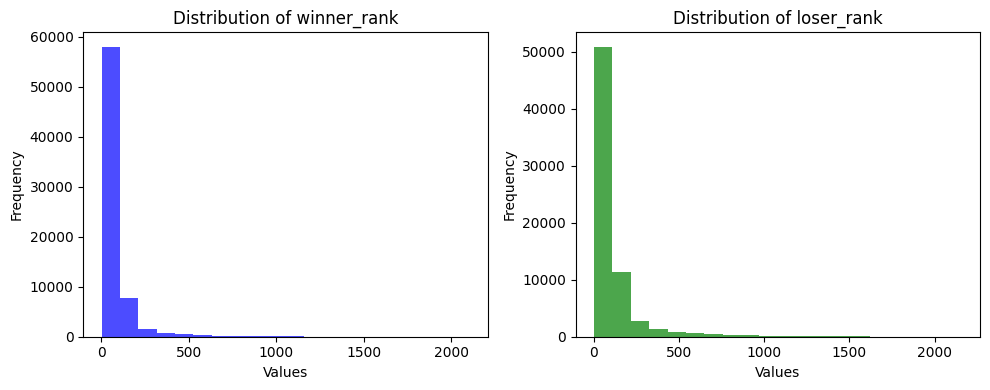

In [445]:
matches_with_rank = matches_df.loc[~matches_df['winner_rank'].isnull() & ~matches_df['loser_rank'].isnull()]

# Plot 2 histograms for distribution of values for "rank"
# Create subplots for the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first histogram for winner_rank
ax1.hist(matches_with_rank['winner_rank'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Distribution of winner_rank')
ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')

# Plot the second histogram for loser_rank
ax2.hist(matches_with_rank['loser_rank'], bins=20, color='green', alpha=0.7)
ax2.set_title('Distribution of loser_rank')
ax2.set_xlabel('Values')
ax2.set_ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

The histogram shows that most matches are won by players ranked in the top 100 (~60'000), which makes sense. Also, there are no outlier values like rank=5'000.

In [446]:
# could matches with empty minutes be due to the tourney_level?
# print(matches_empty_minutes['tourney_level'].value_counts())

#### Tournament start dates
It would be interesting to see on which weekdays tournaments start. Becuase later, we want to link the rankings data with the matches data, so a common day of the week  would be required.

In [447]:
# convert date from tourney_date 
matches_tournament_starts = matches_df.copy()
matches_tournament_starts['tourney_date_dt'] = pd.to_datetime(matches_df['tourney_date'], format='%Y%m%d')

# create a column representing the day of the week
matches_tournament_starts['tourney_date_dt_day_name'] = matches_tournament_starts['tourney_date_dt'].dt.day_name()

# day of week frequency for matches and rankingsday of week frequency for matches and rankings
matches_tournament_starts['tourney_date_dt_day_name'].value_counts(normalize=True)

tourney_date_dt_day_name
Monday      0.809
Friday      0.088
Sunday      0.074
Thursday    0.013
Wednesday   0.011
Saturday    0.004
Tuesday     0.001
Name: proportion, dtype: float64

As seen above, ca. **81%** of the matches started on a Monday. This is a strong case to say that for simplicity, we set all matches to start at the beginning of the week which would be Monday. But before doing this, let's see which matches don't start on a Monday and group by tournament type, then display the results using a bar chart.

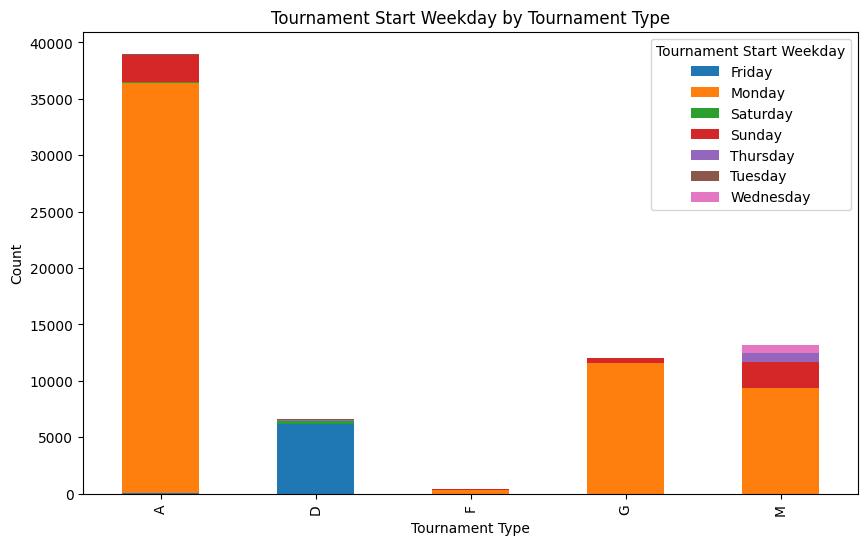

In [448]:
# Group the matches_tournament_starts by 'tourney_level' and 'tourney_date_dt_day_name' and count the occurrences
matches_tournament_starts = matches_tournament_starts.groupby(['tourney_level', 'tourney_date_dt_day_name']).size().unstack().fillna(0)

# Create a stacked bar chart
matches_tournament_starts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Tournament Type')
plt.ylabel('Count')
plt.title('Tournament Start Weekday by Tournament Type')

# Display the legend
plt.legend(title='Tournament Start Weekday', loc='upper right')

# Show the plot
plt.show()

From [matches_data_dictionary.txt](data/matches_data_dictionary.txt):
- 'G' = Grand Slams
- 'M' = Masters 1000s
- 'A' = other tour-level events
- 'C' = Challengers
- 'S' = Satellites/ITFs
- 'F' = Tour finals and other season-ending events
- 'D' = Davis Cup 

Most tournaments start on a Monday, with a notable exception: Davis Cup, which are run over weekends and start on a Friday. 
**Decision**: For better linking with rankings, we've decided that we will set all tournaments' start dates to the Monday which precedes it. For example, if its Friday yyyy-mm-dd, then a supplemental date feature will be provided for its preceding Monday yyyy-mm-dd.

### Prediction benchmark for matches
In order to evaluate the prediction accuracy of our model, we need a benchmark to compare when predicting the results of matches. One simple benchmark would be to assume that the higher (i.e. closer to 1) ranked player will always win. This "higher-ranked player win ratio" can easily be calculated using the features available in the original dataset.
We know that some rankings are empty, so we will just substitute a number higher than the max. ranking (which is 2101).

In [449]:
# setting a prediction benchmark, empty ranking means no ranking, so replace with a arbitrary high value
matches_wins_by_ranking_df = matches_df.copy()
matches_wins_by_ranking_df[['winner_rank','loser_rank']] = matches_wins_by_ranking_df[['winner_rank','loser_rank']].fillna(value=10000)

# add a new feature which is the result of checking whether the winner was ranked higher (i.e. closer to 1) than the loser
matches_wins_by_ranking_df['winning_player_ranked'] = matches_wins_by_ranking_df.apply(lambda x: "higher" if x['winner_rank'] < x['loser_rank'] else "lower", axis=1)
matches_wins_by_ranking_df['winning_player_ranked'].value_counts(normalize=True)*100

winning_player_ranked
higher   65.638
lower    34.362
Name: proportion, dtype: float64

So we see that for our dataset, the higher ranked player won **65.6%** of all the matches. This will be our benchmark for evaluating the model.

### Load rankings
Data is also available in the form of ranking of ATP players. It may be required to supplement the missing data for current rankings in the matches dataset, for example, a player doesn't have a ranking at the time of playing a match. 

### Exploring the rankings data

In [450]:
# create a list of rankings (since the year 2000 ) files to load
atp_rankings_files = [f'{DIRNAME}/atp_rankings_{year}.csv' for year in ['00s','10s', '20s', 'current']]

In [451]:
# create an empty dataframe to store all rankings
rankings_df = pd.DataFrame()

# loop through the list of rankings files, read them and append the data to the combined DataFrame
for filen in atp_rankings_files:
    rankings_df = pd.concat([rankings_df, pd.read_csv(filen, index_col=None)])


In [452]:
# explore the rankings data
rankings_df.head()

,ranking_date,rank,player,points
0,20000110,1,101736,4135.000
1,20000110,2,102338,2915.000
2,20000110,3,101948,2419.000
3,20000110,4,103017,2184.000
4,20000110,5,102856,2169.000


In [453]:
# get an overview of number of features, instances, empty values and data types 
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140631 entries, 0 to 58510
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ranking_date  int64  
 1   rank          int64  
 2   player        int64  
 3   points        float64
dtypes: float64(1), int64(3)
memory usage: 81.7 MB


In [454]:
# sanity checks on the data (min values, max values, etc.)
rankings_df.describe()

,ranking_date,rank,player,points
count,2140631.000,2140631.000,2140631.000,2139882.000
mean,20112972.331,941.096,119768.989,117.056
std,66763.213,547.581,31216.724,455.880
min,20000110.000,1.000,100149.000,1.000
25%,20060213.000,470.000,104128.000,2.000
50%,20110919.000,946.000,105498.000,10.000
75%,20170306.000,1381.000,120568.000,65.000
max,20230911.000,2271.000,212464.000,16950.000


From the above table, the min and max values for the rankings make sense. Also, the ranking_date makes sense. Finally, there are no missing values, so no data cleaning is required on this dataset.

In [455]:
print("Amount of instances and features: " + str(rankings_df.shape))

Amount of instances and features: (2140631, 4)


#### Ranking dates
Similar to which weekdays tournaments start, let's look at the days on which the rankings get updated. Becuase later, we want to link the rankings data with the matches data, so a common day of the week  would be required.

In [456]:
# convert date from ranking_date 
ranking_update = rankings_df.copy()
ranking_update['ranking_date_dt'] = pd.to_datetime(rankings_df['ranking_date'], format='%Y%m%d')

# create a column representing the day of the week
ranking_update['ranking_date_dt_day_name'] = ranking_update['ranking_date_dt'].dt.day_name()

# day of week frequency for ranking
ranking_update['ranking_date_dt_day_name'].value_counts(normalize=True)

ranking_date_dt_day_name
Monday   1.000
Name: proportion, dtype: float64

**All (100%)** of the rankings are updated on a Monday. Therefore, we are aligned with the idea to set all tournament start dates to a Monday.

Below is a final view of the loaded data for rankings, with the new column for the datetime formatted `ranking_date_dt`

In [457]:
# check data types
print(rankings_df.info())

# preview data
rankings_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2140631 entries, 0 to 58510
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ranking_date  int64  
 1   rank          int64  
 2   player        int64  
 3   points        float64
dtypes: float64(1), int64(3)
memory usage: 81.7 MB
None


,ranking_date,rank,player,points
0,20000110,1,101736,4135.000
1,20000110,2,102338,2915.000
2,20000110,3,101948,2419.000
3,20000110,4,103017,2184.000
4,20000110,5,102856,2169.000


## Data processing and cleaning

### Scope of processing and cleaning
1. Replace the matches' winner and loser columns
2. Clean the date features and make them consistent
3. Ensure the matches are sorted as needed
4. Remove matches with result as W/O
5. Players without rankings: 
- seasoned players  (they had a long layoff due to injury, etc.). keep match and lookup ranking from earlier. Apply penalty of 10 ranking places for each week they were absent.
- if they played less than 10 matches (cumulative) - remove match


### Execute the processing and cleaning

#### Start with a copy of the original loaded dataframes

In [458]:
matches_processed_df = matches_df.copy()
rankings_processed_df = rankings_df.copy()

#### Hide winner and loser from columns names
Replace columns starting with 'winner_' and 'loser_' with 'player_1_' and 'player_2_' for the required features. As we want to be able to predict who will be the winner and the loser in each match, we remove the 'winner_' and 'loser_' columns for each match, and instead replace it with player_1_ and player_2 which are the player names in alphabetical order. 

The features starting with 'w_' and 'l_' are measures recorded during the match and will not be used in the model for predicting the outcome, so we remove these features.
We will add a column at the end of the dataframe, which will serve as our y variable.

In [459]:
def hide_winner_loser(input_df):

    # List of required features to be replaced with prefixes player_1 and player_2
    features = ['id', 'seed', 'entry', 'name', 'hand', 'ht', 'ioc', 'age', 'rank', 'rank_points']
    
    # Copy the input DataFrame to a new one
    df = input_df.copy()

    # Add player_1_name and player_2_name columns
    df['player_1_name'] = df.apply(lambda row: min(row['winner_name'], row['loser_name']), axis=1)
    df['player_2_name'] = df.apply(lambda row: max(row['winner_name'], row['loser_name']), axis=1)

    # Transfer the values from 'winner_' and 'loser_' features to 'player_1_' and 'player_2_' features, according to who was the winner & loser
    for feat in features:
        player_1_feature = np.where(df['player_1_name'] == df['winner_name'],
                                    df['winner_' + feat],
                                    df['loser_' + feat]
                                    )
        player_2_feature = np.where(df['player_2_name'] == df['winner_name'],
                                    df['winner_' + feat],
                                    df['loser_' + feat]
                                    )
        df['player_1_' + feat] = player_1_feature
        df['player_2_' + feat] = player_2_feature   

          
    # Add a winner column
    df['winner'] = df.apply(lambda row: 'player_1' if row['winner_name'] == row['player_1_name'] else 'player_2', axis=1)

    # Remove columns starting with 'winner_' and 'loser_' (they have been replaced by player_1_ and player_2_)
    df = df.loc[:, ~df.columns.str.startswith('winner_') & ~df.columns.str.startswith('loser_')]

    # Remove columns starting with 'w_' and 'l_' (not needed for predicting_)
    df = df.loc[:, ~df.columns.str.startswith('w_') & ~df.columns.str.startswith('l_')]

    return df


Let us test the function hide_winner_loser with a sample dataset of 5 instances. Observe the renamed features, from "winnner_" and "loser_" to "player_1" and " player_2", and the new feature called "winner" (our y variable).

In [460]:
output_df = hide_winner_loser(sample_matches_df)
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tourney_id            5 non-null      object 
 1   tourney_name          5 non-null      object 
 2   surface               5 non-null      object 
 3   draw_size             5 non-null      int64  
 4   tourney_level         5 non-null      object 
 5   tourney_date          5 non-null      int64  
 6   match_num             5 non-null      int64  
 7   score                 5 non-null      object 
 8   best_of               5 non-null      int64  
 9   round                 5 non-null      object 
 10  minutes               5 non-null      float64
 11  player_1_name         5 non-null      object 
 12  player_2_name         5 non-null      object 
 13  player_1_id           5 non-null      int64  
 14  player_2_id           5 non-null      int64  
 15  player_1_seed         1 non

In [461]:
# replace the winner and loser columns with player_1 and player_2 for the matches dataset
matches_processed_df= hide_winner_loser(matches_processed_df)
matches_processed_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,player_1_name,player_2_name,player_1_id,player_2_id,player_1_seed,player_2_seed,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_ioc,player_2_ioc,player_1_age,player_2_age,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,winner
0,2000-301,Auckland,Hard,32,A,20000110,1,7-5 4-6 7-5,3,R32,108.000,Jeff Tarango,Tommy Haas,101543,103163,NaN,1.000,NaN,NaN,L,R,180.000,188.000,USA,GER,31.100,21.700,63.000,11.000,595.000,1612.000,player_2
1,2000-301,Auckland,Hard,32,A,20000110,2,7-5 7-5,3,R32,85.000,Franco Squillari,Juan Balcells,102644,102607,NaN,NaN,NaN,Q,L,R,183.000,190.000,ARG,ESP,24.300,24.500,49.000,211.000,723.000,157.000,player_2
2,2000-301,Auckland,Hard,32,A,20000110,3,6-3 6-1,3,R32,56.000,Alberto Berasategui,Alberto Martin,102238,103252,NaN,NaN,NaN,NaN,R,R,173.000,175.000,ESP,ESP,26.500,21.300,59.000,48.000,649.000,726.000,player_2
3,2000-301,Auckland,Hard,32,A,20000110,4,6-4 6-4,3,R32,68.000,Juan Carlos Ferrero,Roger Federer,103507,103819,7.000,NaN,NaN,NaN,R,R,183.000,185.000,ESP,SUI,19.900,18.400,45.000,61.000,768.000,616.000,player_1
4,2000-301,Auckland,Hard,32,A,20000110,5,0-6 7-6(7) 6-1,3,R32,115.000,Michael Sell,Nicolas Escude,102103,102765,NaN,4.000,Q,NaN,R,R,180.000,185.000,USA,FRA,27.300,23.700,167.000,34.000,219.000,873.000,player_1


#### Clean and consistent date features

In [462]:
# create new column for datetime datatype version of the date columns
matches_processed_df['tourney_date_dt'] = pd.to_datetime(matches_processed_df['tourney_date'], format='%Y%m%d')
rankings_processed_df['ranking_date_dt'] = pd.to_datetime(rankings_processed_df['ranking_date'], format='%Y%m%d')

#### Ensure the matches are sorted as needed
This is crucial as we are calculating cumulative measures (e.g. count of prior matches) to base a prediction on. It's not required for the rankings dataset.

In [463]:
# sort matches by tourney_date, tourney_id and match_num, and reset the index as the old one is not required anymore.
matches_processed_df = matches_processed_df.sort_values(['tourney_date', 'tourney_id', 'match_num'], ascending=True)
matches_processed_df = matches_processed_df.reset_index(drop=True) 
matches_processed_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,player_1_name,player_2_name,player_1_id,player_2_id,player_1_seed,player_2_seed,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_ioc,player_2_ioc,player_1_age,player_2_age,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,winner,tourney_date_dt
0,2000-339,Adelaide,Hard,32,A,20000103,1,6-3 6-4,3,R32,76.000,Arnaud Clement,Thomas Enqvist,103096,102358,NaN,1.000,NaN,NaN,R,R,173.000,190.000,FRA,SWE,22.000,25.700,56.000,4.000,805.000,2606.000,player_2,2000-01-03
1,2000-339,Adelaide,Hard,32,A,20000103,2,6-1 6-4,3,R32,45.000,Jens Knippschild,Roger Federer,102533,103819,NaN,NaN,NaN,NaN,R,R,190.000,185.000,GER,SUI,24.800,18.300,91.000,64.000,525.000,749.000,player_2,2000-01-03
2,2000-339,Adelaide,Hard,32,A,20000103,3,3-6 7-6(5) 6-4,3,R32,115.000,Jan Michael Gambill,Wayne Arthurs,102998,101885,NaN,NaN,NaN,NaN,R,L,190.000,190.000,USA,AUS,22.500,28.700,58.000,105.000,803.000,449.000,player_1,2000-01-03
3,2000-339,Adelaide,Hard,32,A,20000103,4,6-2 6-1,3,R32,65.000,Andrew Ilie,Sebastien Grosjean,102776,103206,NaN,7.000,NaN,NaN,R,R,180.000,175.000,AUS,FRA,23.600,21.500,54.000,27.000,845.000,1298.000,player_2,2000-01-03
4,2000-339,Adelaide,Hard,32,A,20000103,5,6-4 6-4,3,R32,68.000,Magnus Norman,Scott Draper,102796,102401,3.000,NaN,NaN,WC,R,L,188.000,178.000,SWE,AUS,23.500,25.500,15.000,154.000,1748.000,297.000,player_1,2000-01-03


#### Remove matches with result as W/O
W/O stands for "Walkover". Matches resulting in W/O should not be considered, so remove them. 

In [464]:
# remove matches resulting in a W/O
matches_processed_df = matches_processed_df[matches_processed_df['score'] != 'W/O']
len(matches_processed_df)

70910

Down from 71'213 to 70'910 instances

#### Remove matches with 0 or less minutes
Not needed

In [465]:
# remove matches with 0 or less minutes
# matches_df = matches_df.loc[matches_df['minutes']<0]


#### Add feature for matches dataset that all tournaments start dates are shown as a Monday

In [466]:
# add feature for tournaments not starting on a Monday, with its value being the preceding Monday
matches_processed_df['tourney_date_dt'] = pd.to_datetime(matches_processed_df['tourney_date'], format='%Y%m%d')
matches_processed_df['tourney_date_dt_preceding_monday'] = matches_processed_df['tourney_date_dt'].apply(lambda x: x - pd.DateOffset(days=x.weekday()) if x.weekday() != 0 else x)

# verify that this feature's date values are all on a Monday
matches_processed_df['tourney_date_dt_preceding_monday'].dt.day_name().value_counts()

tourney_date_dt_preceding_monday
Monday    70910
Name: count, dtype: int64

In [467]:
# check examples of these new column values compared to its original
matches_processed_df[matches_processed_df['tourney_date_dt'].dt.day_name() != 'Monday'][['tourney_date_dt', 'tourney_date_dt_preceding_monday']].groupby(['tourney_date_dt', 'tourney_date_dt_preceding_monday']).size().reset_index(name='count').head(3)

,tourney_date_dt,tourney_date_dt_preceding_monday,count
0,2000-01-28,2000-01-24,6
1,2000-02-04,2000-01-31,88
2,2000-03-17,2000-03-13,4


- 28 Jan. 2000 was a Friday, and 24 Jan. 2000 was the preceding Monday
- 4 Feb. 2000 was a Friday, and 31 Jan. 2000 was the preceding Monday
- 17 Mar. 2000 was a Friday, and 13 Mar. 2000 was the preceding Monday

In [468]:
# matches_processed_df.to_csv("matches_processed_df.csv", sep=",", header=True)

#### Process matches with new players having no ranking 
Remove matches where 1 opponent has so far played less than 10 completed matches. 
Notes: 
- Don't remove matches in the year 2000, as our players could have played 10 matches prior to the year 2000, and our cumulative count features need a year to get working.
- W/O matches don't count, but retirements do.

In [469]:
### example of players where 1 opponent has so far played < 10 completed matches

#### Process matches with seasoned players having no ranking
As explained before, there are matches with seasoned (experienced on the ATP Tour) players having no (empty) rank possibly because they have been inactive due to injury and hence lost their ranking before returning. If they are not new players, we can try and look up their last valid ranking in the rankings file. A recent example is Kevin Anderson, who was inactive for a period due to retiring in May 2022 and then announcing his comeback in July 2023* 

*Source: [Wikipedia "Kevin_Anderson (tennis)", accessed Oct. 2023](https://en.wikipedia.org/wiki/Kevin_Anderson_(tennis))

We will: 
1. for a particular match, find the latest available historical ranking in the rankings dataset for the player in the matches dataset
2. add 10 to the ranking for each week where the player was inactive.

In [470]:
# example of player previously having a ranking but later no ranking
matches_processed_ka_df = matches_processed_df[(matches_processed_df['player_1_name'] == 'Kevin Anderson') 
                                                | (matches_processed_df['player_2_name'] == 'Kevin Anderson')].tail()
matches_processed_ka_df[['tourney_date_dt', 'player_1_id', 'player_2_id', 'player_1_name', 'player_2_name', 'player_1_rank', 'player_2_rank']]

,tourney_date_dt,player_1_id,player_2_id,player_1_name,player_2_name,player_1_rank,player_2_rank
66779,2022-03-21,207678,104731,Juan Manuel Cerundolo,Kevin Anderson,122.000,91.000
70693,2023-07-17,209113,104731,Gabriel Diallo,Kevin Anderson,141.000,NaN
70704,2023-07-17,133835,104731,Gijs Brouwer,Kevin Anderson,145.000,NaN
70710,2023-07-17,104731,200005,Kevin Anderson,Ugo Humbert,NaN,40.000
70867,2023-07-31,111442,104731,Jordan Thompson,Kevin Anderson,71.000,652.000


In [471]:
# define static parameter
rank_penalty_per_week_inactivity = 10

# define a function to look up historic rankings for players having no ranking in a particular match
def impute_missing_rankings(m, r):
    last_rankings = {}  # Dictionary to store the last available player_rank for each player_id

    for i, row in m.iterrows():
        if pd.isna(row['player_1_rank']):
            week = row['tourney_date_dt'] - dt.timedelta(days=row['tourney_date_dt'].weekday())
            p1_id = row['player_1_id']

            # Find the last available ranking date prior to the tourney_date_dt
            last_ranking_date = r[(r['player'] == p1_id) & (r['ranking_date_dt'] < week)]['ranking_date_dt'].max()

            if last_ranking_date:
                last_ranking_row = r[(r['player'] == p1_id) & (r['ranking_date_dt'] == last_ranking_date)]
                if not last_ranking_row.empty:
                    last_rank = last_ranking_row['rank'].values[0]
                    weeks_difference = (week - last_ranking_date).days // 7
                    imputed_rank = last_rank + weeks_difference * rank_penalty_per_week_inactivity
                    if imputed_rank > 3333: # Don't over-penalize
                        m.at[i, 'player_1_rank'] = 3333   # Set a default value   
                    else: 
                        m.at[i, 'player_1_rank'] = imputed_rank
                        last_rankings[p1_id] = imputed_rank
                else:
                    m.at[i, 'player_1_rank'] = 3333  # Set a default value
            else:
                m.at[i, 'player_1_rank'] = 3333  # Set a default value

        if pd.isna(row['player_2_rank']):
            week = row['tourney_date_dt'] - dt.timedelta(days=row['tourney_date_dt'].weekday())
            p2_id = row['player_2_id']

            # Find the last available ranking date prior to the tourney_date_dt
            last_ranking_date = r[(r['player'] == p2_id) & (r['ranking_date_dt'] < week)]['ranking_date_dt'].max()

            if last_ranking_date:
                last_ranking_row = r[(r['player'] == p2_id) & (r['ranking_date_dt'] == last_ranking_date)]
                if not last_ranking_row.empty:
                    last_rank = last_ranking_row['rank'].values[0]
                    weeks_difference = (week - last_ranking_date).days // 7
                    imputed_rank = last_rank + weeks_difference * rank_penalty_per_week_inactivity
                    if imputed_rank > 3333: # Don't over-penalize
                        m.at[i, 'player_2_rank'] = 3333   # Set a default value   
                    else:
                        m.at[i, 'player_2_rank'] = imputed_rank
                        last_rankings[p2_id] = imputed_rank
                else: 
                    m.at[i, 'player_2_rank'] = 3333  # Set a default value
            else:
                m.at[i, 'player_2_rank'] = 3333  # Set a default value


Test the function using the example of Kevin Anderson:

In [472]:
# test function using only reduced dataset: Kevin Anderson
impute_missing_rankings(matches_processed_ka_df, rankings_processed_df)
matches_processed_ka_df[['tourney_date_dt', 'player_1_name', 'player_2_name', 'player_1_rank', 'player_2_rank','round', 'winner']]

,tourney_date_dt,player_1_name,player_2_name,player_1_rank,player_2_rank,round,winner
66779,2022-03-21,Juan Manuel Cerundolo,Kevin Anderson,122.000,91.000,R64,player_1
70693,2023-07-17,Gabriel Diallo,Kevin Anderson,141.000,704.000,R32,player_2
70704,2023-07-17,Gijs Brouwer,Kevin Anderson,145.000,704.000,R16,player_2
70710,2023-07-17,Kevin Anderson,Ugo Humbert,704.000,40.000,QF,player_2
70867,2023-07-31,Jordan Thompson,Kevin Anderson,71.000,652.000,R64,player_1


In [473]:
rankings_processed_df[(rankings_processed_df['ranking_date'].between(20220501, 20230801)) & (rankings_processed_df['player'] == 104731)]

,ranking_date,rank,player,points,ranking_date_dt
182305,20220502,107,104731,602.000,2022-05-02
184458,20220509,104,104731,602.000,2022-05-09
186590,20220516,104,104731,597.000,2022-05-16
188736,20220523,104,104731,597.000,2022-05-23
45886,20230724,645,104731,45.000,2023-07-24
47944,20230731,652,104731,45.000,2023-07-31


In [474]:
weeks_ka_inactive = (dt.date(2023,7,17) - dt.date(2022,5,23)).days  // 7 # no. or weeks inactivity
weeks_ka_inactive * 10 # rank place penalty of 10 per week

600

The penalty of roughly 600 places for a 60 week period of inactivity reflects roughly the output of the function impute_missing_rankings.

Finally, we apply the function to our full dataset, and do a small check to verify that no null values exist anymore for these features:

In [475]:
impute_missing_rankings(matches_processed_df, rankings_processed_df)

In [476]:
matches_processed_df['player_1_rank'].isna().value_counts()

player_1_rank
False    70910
Name: count, dtype: int64

In [477]:
matches_processed_df['player_2_rank'].isna().value_counts()

player_2_rank
False    70910
Name: count, dtype: int64

In [478]:
matches_processed_df[['player_1_rank', 'player_2_rank']].describe()

,player_1_rank,player_2_rank
count,70910.000,70910.000
mean,137.405,135.480
std,377.430,362.677
min,1.000,1.000
25%,27.000,25.000
50%,57.000,58.000
75%,102.000,103.000
max,3333.000,3333.000


## Feature Engineering

In [479]:
# make a new copy of the dataframe, for starting the feature engineering
matches_features_df = matches_processed_df.copy()
matches_features_df.info()
# matches_features_df.to_csv("matches_features_df.csv", sep=',', header=True)

<class 'pandas.core.frame.DataFrame'>
Index: 70910 entries, 0 to 71212
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   tourney_id                        70910 non-null  object        
 1   tourney_name                      70910 non-null  object        
 2   surface                           70910 non-null  object        
 3   draw_size                         70910 non-null  int64         
 4   tourney_level                     70910 non-null  object        
 5   tourney_date                      70910 non-null  int64         
 6   match_num                         70910 non-null  int64         
 7   score                             70910 non-null  object        
 8   best_of                           70910 non-null  int64         
 9   round                             70910 non-null  object        
 10  minutes                           63229 non-null  f

### Add feature for cumulative number of games played so far in a tournament - OPTIONAL and WIP
It would be interesting if the cumulative number of games played so far in a tournament could be used to predict the next result of a match, indicating either fatigue or dominance (won in straight sets). So far this feature is optional for our prediction model.

*Note: this function does not yet work 100%. It doesn't yet calculate the `player_x_tourney_cum_games_count` correctly in the case where a player can appear as player_1 or player_2 in the same tournament.*

In [480]:
# function calc_game_counts: to calculate game counts for each match, uses vectorization instead of row iteration for performance reasons
'''
def calc_game_counts(m):
    # Initialize columns to store game counts
    m['player_1_match_games_count'] = 0
    m['player_2_match_games_count'] = 0
    m['player_1_tourney_cum_games_count'] = 0
    m['player_2_tourney_cum_games_count'] = 0
    
    # Regular expression to match scores
    score_pattern = r'(\d+)-(\d+)(?:\(\d+\))?'
    
    # Extract individual scores using regular expression and convert to numeric values
    scores = m['score'].str.extractall(score_pattern).astype(int)
    m[['player_1_games', 'player_2_games']] = scores.groupby(level=0).sum()
    
    # Determine the winner and adjust game counts accordingly
    winner_mask = m['winner'] == 'player_1'
    m.loc[winner_mask, 'player_1_match_games_count'] = m.loc[winner_mask, 'player_1_games']
    m.loc[~winner_mask, 'player_1_match_games_count'] = m.loc[~winner_mask, 'player_2_games']
    
    m['player_2_match_games_count'] = m['player_1_games'] + m['player_2_games'] - m['player_1_match_games_count']
    
    # Calculate cumulative game counts using groupby and cumsum without resetting
    m['player_1_tourney_cum_games_count'] = m.groupby(['tourney_id', 'player_1_id'])['player_1_match_games_count'].cumsum() - m['player_1_match_games_count']
    m['player_2_tourney_cum_games_count'] = m.groupby(['tourney_id', 'player_2_id'])['player_2_match_games_count'].cumsum() - m['player_2_match_games_count']
    
    # Set the initial cumulative game counts to 0 for the first matches of each player
    m.loc[m.groupby(['tourney_id', 'player_1_id'])['player_1_match_games_count'].cumcount() == 0, 'player_1_tourney_cum_games_count'] = 0
    m.loc[m.groupby(['tourney_id', 'player_2_id'])['player_2_match_games_count'].cumcount() == 0, 'player_2_tourney_cum_games_count'] = 0
    
    return m
'''

"\ndef calc_game_counts(m):\n    # Initialize columns to store game counts\n    m['player_1_match_games_count'] = 0\n    m['player_2_match_games_count'] = 0\n    m['player_1_tourney_cum_games_count'] = 0\n    m['player_2_tourney_cum_games_count'] = 0\n    \n    # Regular expression to match scores\n    score_pattern = r'(\\d+)-(\\d+)(?:\\(\\d+\\))?'\n    \n    # Extract individual scores using regular expression and convert to numeric values\n    scores = m['score'].str.extractall(score_pattern).astype(int)\n    m[['player_1_games', 'player_2_games']] = scores.groupby(level=0).sum()\n    \n    # Determine the winner and adjust game counts accordingly\n    winner_mask = m['winner'] == 'player_1'\n    m.loc[winner_mask, 'player_1_match_games_count'] = m.loc[winner_mask, 'player_1_games']\n    m.loc[~winner_mask, 'player_1_match_games_count'] = m.loc[~winner_mask, 'player_2_games']\n    \n    m['player_2_match_games_count'] = m['player_1_games'] + m['player_2_games'] - m['player_1_match_g

In [481]:
# run the function calc_game_counts on the matches dataset
'''
matches_processed_df = calc_game_counts(matches_processed_df)
'''

'\nmatches_processed_df = calc_game_counts(matches_processed_df)\n'

In [482]:
# test by exporting to .csv
'''matches_processed_df[matches_processed_df['tourney_id'].str.contains('2000-451|2000-301')][['tourney_id','match_num', 'player_1_id','player_2_id',
													   'player_1_name','player_2_name', 'round' ,'score', 'winner', 
														'player_1_match_games_count', 'player_2_match_games_count',
														'player_1_tourney_cum_games_count', 'player_2_tourney_cum_games_count']].to_csv("matches_processed.csv", sep=',', header=True, index=False)
'''

'matches_processed_df[matches_processed_df[\'tourney_id\'].str.contains(\'2000-451|2000-301\')][[\'tourney_id\',\'match_num\', \'player_1_id\',\'player_2_id\',\n\t\t\t\t\t\t\t\t\t\t\t\t\t   \'player_1_name\',\'player_2_name\', \'round\' ,\'score\', \'winner\', \n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\'player_1_match_games_count\', \'player_2_match_games_count\',\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\'player_1_tourney_cum_games_count\', \'player_2_tourney_cum_games_count\']].to_csv("matches_processed.csv", sep=\',\', header=True, index=False)\n'

In [483]:
# review the output of the new columns for the first 31 rows (1 tournament)
'''
matches_processed_df[['tourney_id','match_num', 'player_1_id','player_2_id',
													   'player_1_name','player_2_name', 'round' ,'score', 'winner', 
														'player_1_match_games_count', 'player_2_match_games_count',
														'player_1_tourney_cum_games_count', 'player_2_tourney_cum_games_count']].head(31)
'''

"\nmatches_processed_df[['tourney_id','match_num', 'player_1_id','player_2_id',\n\t\t\t\t\t\t\t\t\t\t\t\t\t   'player_1_name','player_2_name', 'round' ,'score', 'winner', \n\t\t\t\t\t\t\t\t\t\t\t\t\t\t'player_1_match_games_count', 'player_2_match_games_count',\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t'player_1_tourney_cum_games_count', 'player_2_tourney_cum_games_count']].head(31)\n"

### Add feature for ranking difference
This feature may help our model more easily assess the how the ranking plays a factor in determining the winner of the match. It simply calculates the difference between player_2_rank and player_1_rank. In that case, if player 1 is higher ranked than player 2, the resulting number will be a positive (and vice-versa).



In [484]:
matches_features_df['ranking_difference'] = matches_features_df['player_2_rank'] - matches_features_df['player_1_rank']

# preview the result for the last 5 observations of the dataset
matches_features_df[['tourney_date_dt', 'player_1_name', 'player_1_rank','player_2_name', 'player_2_rank', 'ranking_difference']].tail(5)

,tourney_date_dt,player_1_name,player_1_rank,player_2_name,player_2_rank,ranking_difference
71208,2023-08-28,Ben Shelton,47.000,Frances Tiafoe,10.000,-37.000
71209,2023-08-28,Novak Djokovic,2.000,Taylor Fritz,9.000,7.000
71210,2023-08-28,Carlos Alcaraz,1.000,Daniil Medvedev,3.000,2.000
71211,2023-08-28,Ben Shelton,47.000,Novak Djokovic,2.000,-45.000
71212,2023-08-28,Daniil Medvedev,3.000,Novak Djokovic,2.000,-1.000


In [485]:
# preview the result for the first 5 observations of the dataset
matches_features_df[['tourney_date_dt', 'player_1_name', 'player_1_rank','player_2_name', 'player_2_rank', 'ranking_difference']].head(5)

,tourney_date_dt,player_1_name,player_1_rank,player_2_name,player_2_rank,ranking_difference
0,2000-01-03,Arnaud Clement,56.000,Thomas Enqvist,4.000,-52.000
1,2000-01-03,Jens Knippschild,91.000,Roger Federer,64.000,-27.000
2,2000-01-03,Jan Michael Gambill,58.000,Wayne Arthurs,105.000,47.000
3,2000-01-03,Andrew Ilie,54.000,Sebastien Grosjean,27.000,-27.000
4,2000-01-03,Magnus Norman,15.000,Scott Draper,154.000,139.000


### Add feature for cumulative matches played count, and win percentages per surface and tourney level for player 1 and player 2
This cumulative matches played count and win percentages per surface and tourney level are important features for our prediction model.

#### Surface win %
This feature will show a player's success so far on a particular tennis court surface. There will be a number expressed as a percentage which will reflect the number of wins divided by the total matches on a surface, prior to that match taking place.
First, what are the different surfaces being played on?

In [486]:
# what are the different surfaces played on since 2000?
matches_features_df['surface'].value_counts(normalize=True)

surface
Hard     0.541
Clay     0.327
Grass    0.103
Carpet   0.029
Name: proportion, dtype: float64

In [487]:
# what are the different surfaces played on in the top 10 tournaments in 2000?
print(matches_features_df[matches_features_df['surface'] == 'Hard']['tourney_name'].value_counts().head(10))
print(matches_features_df[matches_features_df['surface'] == 'Clay']['tourney_name'].value_counts().head(10))
print(matches_features_df[matches_features_df['surface'] == 'Grass']['tourney_name'].value_counts().head(10))
print(matches_features_df[matches_features_df['surface'] == 'Carpet']['tourney_name'].value_counts().head(10))


tourney_name
Australian Open         3042
US Open                 2535
Miami Masters           2172
Indian Wells Masters    2041
Cincinnati Masters      1372
Canada Masters          1301
Washington              1053
Tokyo                    816
Paris Masters            768
Dubai                    756
Name: count, dtype: int64
tourney_name
Roland Garros          3042
Rome Masters           1409
Monte Carlo Masters    1316
Barcelona              1179
Madrid Masters          803
Kitzbuhel               788
Buenos Aires            682
Munich                  668
Gstaad                  658
Estoril                 658
Name: count, dtype: int64
tourney_name
Wimbledon          2913
Queen's Club       1065
Halle               698
Newport             680
s Hertogenbosch     649
Nottingham          370
Eastbourne          336
Stuttgart           214
Antalya              81
Mallorca             79
Name: count, dtype: int64
tourney_name
Paris Masters                  327
Lyon                     

In [488]:
# create a test dataset for all 4 surface types, and preview the columns and sample rows relevant for calculation
matches_4surfaces = matches_features_df[(matches_features_df['tourney_name'].isin(['Auckland', 'Barcelona', 'Halle', 'Basel']))
					& (matches_features_df['tourney_date'] < 20010000)][['tourney_name', 'tourney_date_dt', 'match_num', 'surface', 'tourney_level'
                                                                                , 'player_1_id', 'player_2_id', 'player_1_name', 'player_2_name'
                                                                                , 'winner'
					]]
matches_4surfaces

,tourney_name,tourney_date_dt,match_num,surface,tourney_level,player_1_id,player_2_id,player_1_name,player_2_name,winner
93,Auckland,2000-01-10,1,Hard,A,101543,103163,Jeff Tarango,Tommy Haas,player_2
94,Auckland,2000-01-10,2,Hard,A,102644,102607,Franco Squillari,Juan Balcells,player_2
95,Auckland,2000-01-10,3,Hard,A,102238,103252,Alberto Berasategui,Alberto Martin,player_2
96,Auckland,2000-01-10,4,Hard,A,103507,103819,Juan Carlos Ferrero,Roger Federer,player_1
97,Auckland,2000-01-10,5,Hard,A,102103,102765,Michael Sell,Nicolas Escude,player_1
...,...,...,...,...,...,...,...,...,...,...
3106,Basel,2000-10-23,27,Carpet,A,102271,102450,Hicham Arazi,Tim Henman,player_2
3107,Basel,2000-10-23,28,Carpet,A,103103,102358,Dominik Hrbaty,Thomas Enqvist,player_2
3108,Basel,2000-10-23,29,Carpet,A,103720,103819,Lleyton Hewitt,Roger Federer,player_2
3109,Basel,2000-10-23,30,Carpet,A,102358,102450,Thomas Enqvist,Tim Henman,player_1


#### Tournament level win %
This feature will show a player's success so far on a particular type (level) of tournament. There will be a number expressed as a percentage which will reflect the number of wins divided by the total matches on that level, prior to that match taking place.
First, what are the different tournament level being played?  

In [489]:
# what are the different tournament levels played since 2000?
matches_features_df['tourney_level'].value_counts(normalize=True)

tourney_level
A   0.547
M   0.185
G   0.170
D   0.093
F   0.005
Name: proportion, dtype: float64

#### Function to calculate win %s

In [490]:
def calc_cum_match_counts_and_pct (df):

    # Initialize dictionaries to keep track of cumulative match counts and wins for each player and surface
    player_cumulative_counts = {}
    player_surface_cumulative_counts = {}
    player_surface_cumulative_wins = {}
    player_tourney_level_cumulative_counts = {}
    player_tourney_level_cumulative_wins = {}

    # Lists to store the cumulative match counts for each row
    player_1_cumulative_counts_list = []
    player_2_cumulative_counts_list = []
    player_1_surface_cumulative_counts_list = []
    player_2_surface_cumulative_counts_list = []
    player_1_surface_cumulative_wins_list = []
    player_2_surface_cumulative_wins_list = []
    player_1_tourney_level_cumulative_counts_list = []
    player_2_tourney_level_cumulative_counts_list = []
    player_1_tourney_level_cumulative_wins_list = []
    player_2_tourney_level_cumulative_wins_list = []

    for index, row in df.iterrows():
        player_1_id = row['player_1_id']
        player_2_id = row['player_2_id']
        surface = row['surface']
        tourney_level = row['tourney_level']

        # Get the cumulative match counts so far for each player
        player_1_cumulative_count = player_cumulative_counts.get(player_1_id, 0)
        player_2_cumulative_count = player_cumulative_counts.get(player_2_id, 0)

        # Get the cumulative match counts and wins on the current surface for each player
        player_1_surface_cumulative_count = player_surface_cumulative_counts.get((player_1_id, surface), 0)
        player_2_surface_cumulative_count = player_surface_cumulative_counts.get((player_2_id, surface), 0)
        player_1_surface_cumulative_wins = player_surface_cumulative_wins.get((player_1_id, surface), 0)
        player_2_surface_cumulative_wins = player_surface_cumulative_wins.get((player_2_id, surface), 0)

        # Get the cumulative match counts and wins on the current tourney level for each player
        player_1_tourney_level_cumulative_count = player_tourney_level_cumulative_counts.get((player_1_id, tourney_level), 0)
        player_2_tourney_level_cumulative_count = player_tourney_level_cumulative_counts.get((player_2_id, tourney_level), 0)
        player_1_tourney_level_cumulative_wins = player_tourney_level_cumulative_wins.get((player_1_id, tourney_level), 0)
        player_2_tourney_level_cumulative_wins = player_tourney_level_cumulative_wins.get((player_2_id, tourney_level), 0)

        # Update the cumulative match counts and wins for each player, surface and tourney level in the current players' lists
        player_1_cumulative_counts_list.append(player_1_cumulative_count)
        player_2_cumulative_counts_list.append(player_2_cumulative_count)
        player_1_surface_cumulative_counts_list.append(player_1_surface_cumulative_count)
        player_2_surface_cumulative_counts_list.append(player_2_surface_cumulative_count)
        player_1_tourney_level_cumulative_counts_list.append(player_1_tourney_level_cumulative_count)
        player_2_tourney_level_cumulative_counts_list.append(player_2_tourney_level_cumulative_count)

        # Calculate and update the cumulative match won percentage on the current surface for each player
        player_1_surface_cumulative_wins_percentage = (
            player_1_surface_cumulative_wins / player_1_surface_cumulative_count
        ) if player_1_surface_cumulative_count > 0 else 0.0
        player_2_surface_cumulative_wins_percentage = (
            player_2_surface_cumulative_wins / player_2_surface_cumulative_count
        ) if player_2_surface_cumulative_count > 0 else 0.0

        player_1_surface_cumulative_wins_list.append(player_1_surface_cumulative_wins_percentage)
        player_2_surface_cumulative_wins_list.append(player_2_surface_cumulative_wins_percentage)

        # Calculate and update the cumulative match won percentage on the current tourney level for each player
        player_1_tourney_level_cumulative_wins_percentage = (
            player_1_tourney_level_cumulative_wins / player_1_tourney_level_cumulative_count
        ) if player_1_tourney_level_cumulative_count > 0 else 0.0
        player_2_tourney_level_cumulative_wins_percentage = (
            player_2_tourney_level_cumulative_wins / player_2_tourney_level_cumulative_count
        ) if player_2_tourney_level_cumulative_count > 0 else 0.0

        player_1_tourney_level_cumulative_wins_list.append(player_1_tourney_level_cumulative_wins_percentage)
        player_2_tourney_level_cumulative_wins_list.append(player_2_tourney_level_cumulative_wins_percentage)

        # Increment the cumulative match counts and wins for each player and surface in the dictionaries
        player_cumulative_counts[player_1_id] = player_1_cumulative_count + 1
        player_cumulative_counts[player_2_id] = player_2_cumulative_count + 1
        player_surface_cumulative_counts[(player_1_id, surface)] = player_1_surface_cumulative_count + 1
        player_surface_cumulative_counts[(player_2_id, surface)] = player_2_surface_cumulative_count + 1
        player_tourney_level_cumulative_counts[(player_1_id, tourney_level)] = player_1_tourney_level_cumulative_count + 1
        player_tourney_level_cumulative_counts[(player_2_id, tourney_level)] = player_2_tourney_level_cumulative_count + 1

        # Increment the cumulative match wins on the current surface for the winner
        if row['winner'] == 'player_1':
            player_surface_cumulative_wins[(player_1_id, surface)] = player_1_surface_cumulative_wins + 1
        else:
            player_surface_cumulative_wins[(player_2_id, surface)] = player_2_surface_cumulative_wins + 1

        # Increment the cumulative match wins on the current tourney level for the winner
        if row['winner'] == 'player_1':
            player_tourney_level_cumulative_wins[(player_1_id, tourney_level)] = player_1_tourney_level_cumulative_wins + 1
        else:
            player_tourney_level_cumulative_wins[(player_2_id, tourney_level)] = player_2_tourney_level_cumulative_wins + 1

    # Add the cumulative match count and surface-related columns to the input dataset
    df['player_1_cum_match_count'] = player_1_cumulative_counts_list
    df['player_2_cum_match_count'] = player_2_cumulative_counts_list
    df['player_1_surface_cum_match_count'] = player_1_surface_cumulative_counts_list
    df['player_2_surface_cum_match_count'] = player_2_surface_cumulative_counts_list
    df['player_1_surface_cum_win_percentage'] = player_1_surface_cumulative_wins_list
    df['player_2_surface_cum_win_percentage'] = player_2_surface_cumulative_wins_list
    df['player_1_tourney_level_cum_match_count'] = player_1_tourney_level_cumulative_counts_list
    df['player_2_tourney_level_cum_match_count'] = player_2_tourney_level_cumulative_counts_list
    df['player_1_tourney_level_cum_win_percentage'] = player_1_tourney_level_cumulative_wins_list
    df['player_2_tourney_level_cum_win_percentage'] = player_2_tourney_level_cumulative_wins_list

    return df


In [491]:
# Apply the function to the data
matches_features_df = calc_cum_match_counts_and_pct(matches_features_df)

#### Test the function on some data

In [492]:
# test surface win pct and tourney level win pct for one player
matches_features_df[(matches_features_df['player_1_name'] == 'Roger Federer') 
                     |
                     (matches_features_df['player_2_name'] == 'Roger Federer')][['tourney_name', 'tourney_date_dt', 'match_num', 'surface', 'tourney_level'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                 , 'player_1_surface_cum_win_percentage','player_2_surface_cum_win_percentage'
                                                                                 , 'player_1_tourney_level_cum_win_percentage','player_2_tourney_level_cum_win_percentage']]

,tourney_name,tourney_date_dt,match_num,surface,tourney_level,player_1_name,player_2_name,winner,player_1_surface_cum_win_percentage,player_2_surface_cum_win_percentage,player_1_tourney_level_cum_win_percentage,player_2_tourney_level_cum_win_percentage
1,Adelaide,2000-01-03,2,Hard,A,Jens Knippschild,Roger Federer,player_2,0.000,0.000,0.000,0.000
16,Adelaide,2000-01-03,17,Hard,A,Roger Federer,Thomas Enqvist,player_2,1.000,1.000,1.000,1.000
96,Auckland,2000-01-10,4,Hard,A,Juan Carlos Ferrero,Roger Federer,player_1,0.000,0.500,0.000,0.500
206,Australian Open,2000-01-17,52,Hard,G,Michael Chang,Roger Federer,player_2,0.800,0.333,0.000,0.000
244,Australian Open,2000-01-17,90,Hard,G,Jan Kroslak,Roger Federer,player_2,0.500,0.500,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...
64696,Wimbledon,2021-06-28,148,Grass,G,Adrian Mannarino,Roger Federer,player_2,0.589,0.879,0.429,0.865
64736,Wimbledon,2021-06-28,188,Grass,G,Richard Gasquet,Roger Federer,player_2,0.676,0.880,0.637,0.866
64756,Wimbledon,2021-06-28,208,Grass,G,Cameron Norrie,Roger Federer,player_2,0.524,0.880,0.462,0.866
64766,Wimbledon,2021-06-28,218,Grass,G,Lorenzo Sonego,Roger Federer,player_2,0.688,0.881,0.476,0.866


In [493]:
# test surface win pct and tourney level win pct for another player
matches_features_df[(matches_features_df['player_1_name'] == 'Thomas Enqvist') 
                    | (matches_features_df['player_2_name'] == 'Thomas Enqvist')][['tourney_name', 'tourney_date_dt', 'match_num', 'surface', 'tourney_level'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                , 'player_1_surface_cum_win_percentage','player_2_surface_cum_win_percentage'
                                                                                , 'player_1_tourney_level_cum_win_percentage','player_2_tourney_level_cum_win_percentage']]

,tourney_name,tourney_date_dt,match_num,surface,tourney_level,player_1_name,player_2_name,winner,player_1_surface_cum_win_percentage,player_2_surface_cum_win_percentage,player_1_tourney_level_cum_win_percentage,player_2_tourney_level_cum_win_percentage
0,Adelaide,2000-01-03,1,Hard,A,Arnaud Clement,Thomas Enqvist,player_2,0.000,0.000,0.000,0.000
16,Adelaide,2000-01-03,17,Hard,A,Roger Federer,Thomas Enqvist,player_2,1.000,1.000,1.000,1.000
24,Adelaide,2000-01-03,25,Hard,A,Sebastien Grosjean,Thomas Enqvist,player_2,1.000,1.000,1.000,1.000
28,Adelaide,2000-01-03,29,Hard,A,Magnus Norman,Thomas Enqvist,player_2,1.000,1.000,1.000,1.000
30,Adelaide,2000-01-03,31,Hard,A,Lleyton Hewitt,Thomas Enqvist,player_1,1.000,1.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...
17909,Roland Garros,2005-05-23,47,Clay,G,Lukas Dlouhy,Thomas Enqvist,player_1,0.000,0.491,0.000,0.583
18143,Wimbledon,2005-06-20,6,Grass,G,Hyung Taik Lee,Thomas Enqvist,player_1,0.476,0.524,0.429,0.571
19406,Stockholm,2005-10-10,7,Hard,A,Rainer Schuettler,Thomas Enqvist,player_1,0.594,0.571,0.568,0.554
19542,Lyon,2005-10-24,3,Carpet,A,Gregory Carraz,Thomas Enqvist,player_2,0.500,0.619,0.431,0.550


In [494]:
# test for 4 tournaments, each on different surface
matches_4surfaces_calc = calc_cum_match_counts_and_pct(matches_4surfaces)
matches_4surfaces_calc[['tourney_name', 'tourney_date_dt', 'match_num', 'surface'
                                                                                , 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                 , 'player_1_surface_cum_win_percentage','player_2_surface_cum_win_percentage']].head(10)

,tourney_name,tourney_date_dt,match_num,surface,player_1_name,player_2_name,winner,player_1_surface_cum_win_percentage,player_2_surface_cum_win_percentage
93,Auckland,2000-01-10,1,Hard,Jeff Tarango,Tommy Haas,player_2,0.000,0.000
94,Auckland,2000-01-10,2,Hard,Franco Squillari,Juan Balcells,player_2,0.000,0.000
95,Auckland,2000-01-10,3,Hard,Alberto Berasategui,Alberto Martin,player_2,0.000,0.000
96,Auckland,2000-01-10,4,Hard,Juan Carlos Ferrero,Roger Federer,player_1,0.000,0.000
97,Auckland,2000-01-10,5,Hard,Michael Sell,Nicolas Escude,player_1,0.000,0.000
98,Auckland,2000-01-10,6,Hard,Byron Black,Michael Chang,player_2,0.000,0.000
99,Auckland,2000-01-10,7,Hard,Magnus Gustafsson,Mark Nielsen,player_1,0.000,0.000
100,Auckland,2000-01-10,8,Hard,Glenn Weiner,Thomas Johansson,player_2,0.000,0.000
101,Auckland,2000-01-10,9,Hard,Goran Ivanisevic,Sjeng Schalken,player_2,0.000,0.000
102,Auckland,2000-01-10,10,Hard,Markus Hantschk,Tomas Behrend,player_2,0.000,0.000


In [495]:
# create a test dataset for all 5 tournament levels, and preview the columns and sample rows relevant for calculation
matches_5levels = matches_features_df[(matches_features_df['tourney_name'].isin(['Auckland', 'Davis Cup QLS R1: GER vs SUI', 'Tour Finals', 'Australian Open', 'Indian Wells Masters',]))
					& (matches_features_df['tourney_date'] < 20010000)][['tourney_name', 'tourney_date_dt', 'match_num', 'tourney_level'
                                                                                , 'player_1_id', 'player_2_id', 'player_1_name', 'player_2_name'
                                                                                , 'winner'
                                                                                , 'player_1_tourney_level_cum_win_percentage','player_2_tourney_level_cum_win_percentage'
					]]
matches_5levels

,tourney_name,tourney_date_dt,match_num,tourney_level,player_1_id,player_2_id,player_1_name,player_2_name,winner,player_1_tourney_level_cum_win_percentage,player_2_tourney_level_cum_win_percentage
93,Auckland,2000-01-10,1,A,101543,103163,Jeff Tarango,Tommy Haas,player_2,0.000,0.000
94,Auckland,2000-01-10,2,A,102644,102607,Franco Squillari,Juan Balcells,player_2,0.500,0.000
95,Auckland,2000-01-10,3,A,102238,103252,Alberto Berasategui,Alberto Martin,player_2,0.500,0.667
96,Auckland,2000-01-10,4,A,103507,103819,Juan Carlos Ferrero,Roger Federer,player_1,0.000,0.500
97,Auckland,2000-01-10,5,A,102103,102765,Michael Sell,Nicolas Escude,player_1,0.000,0.750
...,...,...,...,...,...,...,...,...,...,...,...
822,Indian Wells Masters,2000-03-13,59,M,102882,102854,Mark Philippoussis,Sjeng Schalken,player_1,1.000,1.000
823,Indian Wells Masters,2000-03-13,60,M,101948,102358,Pete Sampras,Thomas Enqvist,player_2,1.000,1.000
824,Indian Wells Masters,2000-03-13,61,M,102374,102839,Alex Corretja,Nicolas Lapentti,player_1,1.000,1.000
825,Indian Wells Masters,2000-03-13,62,M,102882,102358,Mark Philippoussis,Thomas Enqvist,player_2,1.000,1.000


### Head-to-head


This function calculates the head-to-head record for two players, and expresses the result as a percentage. 

In [558]:
def calc_h2h_win_pct(df):

    # Create a dictionary to store cumulative wins and matches for each pair of players
    h2h_stats = {}

    # Initialize new columns
    df['player_1_h2h_win_pct'] = 0.0
    df['player_2_h2h_win_pct'] = 0.0

    # Calculate head-to-head win percentage
    for index, row in df.iterrows():
        player_1_id = row['player_1_id']
        player_2_id = row['player_2_id']
        winner = row['winner']

        # Create a unique key for the pair of players
        player_pair_key = tuple(sorted([player_1_id, player_2_id]))

        # Update head-to-head stats for the player pair
        h2h_stats[player_pair_key] = h2h_stats.get(player_pair_key, {'wins': 0, 'matches': 0})

        # Calculate and update head-to-head win percentages
        if h2h_stats[player_pair_key]['matches'] == 0:
            # At the first match, both win percentages are set to 0
            df.at[index, 'player_1_h2h_win_pct'] = 0.0
            df.at[index, 'player_2_h2h_win_pct'] = 0.0
        else:
            # For subsequent matches, calculate based on the previous match
            player_1_win_pct = h2h_stats[player_pair_key]['wins'] / h2h_stats[player_pair_key]['matches']
            df.at[index, 'player_1_h2h_win_pct'] = player_1_win_pct
            df.at[index, 'player_2_h2h_win_pct'] = 1.0 - player_1_win_pct

        # Update head-to-head stats for the player pair after the match
        h2h_stats[player_pair_key]['matches'] += 1
        if winner == 'player_1':
            h2h_stats[player_pair_key]['wins'] += 1

    return df

In [559]:
# Apply the function to the data
matches_features_df = calc_h2h_win_pct(matches_features_df)

In [557]:
# create a test dataset for 2 players' head-to-head matches, and preview the columns and sample rows relevant for calculation

matches_2players = matches_features_df[((matches_features_df['player_1_name'] == 'Carlos Alcaraz') & (matches_features_df['player_2_name'] == 'Jannik Sinner')) | 
                 ((matches_features_df['player_1_name'] == 'Jannik Sinner') & (matches_features_df['player_2_name'] == 'Carlos Alcaraz'))][['tourney_name', 'tourney_date_dt', 'match_num', 'tourney_level', 'round'
                                                                                                                                        , 'player_1_id', 'player_2_id', 'player_1_name', 'player_2_name'
                                                                                                                                        , 'winner'
                                                                                                                                        , 'player_1_h2h_win_pct','player_2_h2h_win_pct'
                                                                                                                                        ]]
matches_2players

,tourney_name,tourney_date_dt,match_num,tourney_level,round,player_1_id,player_2_id,player_1_name,player_2_name,winner,player_1_h2h_win_pct,player_2_h2h_win_pct
65786,Paris Masters,2021-11-01,273,M,R32,207989,206173,Carlos Alcaraz,Jannik Sinner,player_1,0.000,0.000
67649,Wimbledon,2022-06-27,213,G,R16,207989,206173,Carlos Alcaraz,Jannik Sinner,player_2,1.000,0.000
67828,Umag,2022-07-25,300,A,F,207989,206173,Carlos Alcaraz,Jannik Sinner,player_2,0.500,0.500
68209,Us Open,2022-08-29,222,G,QF,207989,206173,Carlos Alcaraz,Jannik Sinner,player_1,0.333,0.667
69660,Indian Wells Masters,2023-03-06,299,M,SF,207989,206173,Carlos Alcaraz,Jannik Sinner,player_1,0.500,0.500
69755,Miami Masters,2023-03-20,299,M,SF,207989,206173,Carlos Alcaraz,Jannik Sinner,player_2,0.600,0.400


### Recent form

## Data Analysis

Some basics first before moving to the prediction models: what features are we left with after data processing and feature engineering?

In [496]:
matches_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70910 entries, 0 to 71212
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   tourney_id                                 70910 non-null  object        
 1   tourney_name                               70910 non-null  object        
 2   surface                                    70910 non-null  object        
 3   draw_size                                  70910 non-null  int64         
 4   tourney_level                              70910 non-null  object        
 5   tourney_date                               70910 non-null  int64         
 6   match_num                                  70910 non-null  int64         
 7   score                                      70910 non-null  object        
 8   best_of                                    70910 non-null  int64         
 9   round                 

We have engineered so far these features for assisting our prediction model:
- ranking_difference
- player_1_surface_cum_win_percentage     
- player_2_surface_cum_win_percentage
- player_1_tourney_level_cum_win_percentage
- player_2_tourney_level_cum_win_percentage

The majority of the other features in our dataset are probably not needed,  # , 'player_1_tourney_level_cum_win_percentage'
                                                        # , 'player_2_tourney_level_cum_win_percentage'and when applying encoding, we'll end up with a lot of additional useless features. 
So as a final step, we remove unused features from out dataset.

In [497]:
matches_features_df.isnull().sum()

tourney_id                                       0
tourney_name                                     0
surface                                          0
draw_size                                        0
tourney_level                                    0
tourney_date                                     0
match_num                                        0
score                                            0
best_of                                          0
round                                            0
minutes                                       7681
player_1_name                                    0
player_2_name                                    0
player_1_id                                      0
player_2_id                                      0
player_1_seed                                48476
player_2_seed                                47754
player_1_entry                               59387
player_2_entry                               58962
player_1_hand                  

In [502]:
matches_features_trimmed_df = matches_features_df.drop(columns=[
                                                        'tourney_id'
                                                        , 'tourney_name'
                                                        , 'surface'
                                                        , 'draw_size'
                                                        , 'tourney_level'
                                                        , 'tourney_date'
                                                        , 'match_num'
                                                        , 'score'
                                                        , 'best_of'
                                                        , 'round'
                                                        , 'minutes'
                                                        , 'player_1_name'
                                                        , 'player_2_name'
                                                        # , 'player_1_id'
                                                        # , 'player_2_id'
                                                        , 'player_1_seed'
                                                        , 'player_2_seed'
                                                        , 'player_1_entry'
                                                        , 'player_2_entry'
                                                        , 'player_1_hand'
                                                        , 'player_2_hand'
                                                        , 'player_1_ht'
                                                        , 'player_2_ht'
                                                        , 'player_1_ioc'
                                                        , 'player_2_ioc'
                                                        , 'player_1_age'
                                                        , 'player_2_age'
                                                        , 'player_1_rank'
                                                        , 'player_2_rank'
                                                        , 'player_1_rank_points'
                                                        , 'player_2_rank_points'
                                                        # , 'winner'
                                                        , 'tourney_date_dt'
                                                        , 'tourney_date_dt_preceding_monday'
                                                        # , 'ranking_difference'
                                                        , 'player_1_cum_match_count'
                                                        , 'player_2_cum_match_count'
                                                        , 'player_1_surface_cum_match_count'
                                                        , 'player_2_surface_cum_match_count'
                                                        # , 'player_1_surface_cum_win_percentage'
                                                        # , 'player_2_surface_cum_win_percentage'
                                                        , 'player_1_tourney_level_cum_match_count'
                                                        , 'player_2_tourney_level_cum_match_count'
                                                        # , 'player_1_tourney_level_cum_win_percentage'
                                                        # , 'player_2_tourney_level_cum_win_percentage'
                                                        ], axis=1)
matches_features_trimmed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70910 entries, 0 to 71212
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   player_1_id                                70910 non-null  int64  
 1   player_2_id                                70910 non-null  int64  
 2   winner                                     70910 non-null  object 
 3   ranking_difference                         70910 non-null  float64
 4   player_1_surface_cum_win_percentage        70910 non-null  float64
 5   player_2_surface_cum_win_percentage        70910 non-null  float64
 6   player_1_tourney_level_cum_win_percentage  70910 non-null  float64
 7   player_2_tourney_level_cum_win_percentage  70910 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 6.9+ MB


OPTIONAL - As can be seen above, there are still some features with object as data type. We'll convert one of them to integer data type, so as not to create too many combinations during encoding. 

In [ ]:
# convert some features' object data types to int
# matches_features_trimmed_df['tourney_id'] = matches_features_trimmed_df['tourney_id'].astype('int64')

In [ ]:
# remove data for the year 2000, so the majority of features with values = 0 is removed

## Prediction

In this section, we apply several different prediction models to determine which one gives us the most accurate results for predicting the outcome of a match.

### Prepare the data

In [503]:
# make a new copy of the dataframe, for starting the prediction models
matches_pred_df = matches_features_trimmed_df.copy()
matches_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70910 entries, 0 to 71212
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   player_1_id                                70910 non-null  int64  
 1   player_2_id                                70910 non-null  int64  
 2   winner                                     70910 non-null  object 
 3   ranking_difference                         70910 non-null  float64
 4   player_1_surface_cum_win_percentage        70910 non-null  float64
 5   player_2_surface_cum_win_percentage        70910 non-null  float64
 6   player_1_tourney_level_cum_win_percentage  70910 non-null  float64
 7   player_2_tourney_level_cum_win_percentage  70910 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 6.9+ MB


In [504]:
#encode categorical data
train = pd.get_dummies(matches_pred_df, drop_first=True)
train.head()

,player_1_id,player_2_id,ranking_difference,player_1_surface_cum_win_percentage,player_2_surface_cum_win_percentage,player_1_tourney_level_cum_win_percentage,player_2_tourney_level_cum_win_percentage,winner_player_2
0,103096,102358,-52.000,0.000,0.000,0.000,0.000,True
1,102533,103819,-27.000,0.000,0.000,0.000,0.000,True
2,102998,101885,47.000,0.000,0.000,0.000,0.000,False
3,102776,103206,-27.000,0.000,0.000,0.000,0.000,True
4,102796,102401,139.000,0.000,0.000,0.000,0.000,False


In [505]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70910 entries, 0 to 71212
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   player_1_id                                70910 non-null  int64  
 1   player_2_id                                70910 non-null  int64  
 2   ranking_difference                         70910 non-null  float64
 3   player_1_surface_cum_win_percentage        70910 non-null  float64
 4   player_2_surface_cum_win_percentage        70910 non-null  float64
 5   player_1_tourney_level_cum_win_percentage  70910 non-null  float64
 6   player_2_tourney_level_cum_win_percentage  70910 non-null  float64
 7   winner_player_2                            70910 non-null  bool   
dtypes: bool(1), float64(5), int64(2)
memory usage: 6.4 MB


### Define some helper functions

#### Actual price vs predicted price plot

In [506]:
def actual_vs_predicted_plot(y_true, y_pred):
  min_value=np.array([y_true.min(), y_pred.min()]).min()
  max_value= min=np.array([y_true.max(), y_pred.max()]).max()
  fig = plt.figure()
  ax = fig.gca()
  ax.scatter(y_true,y_pred, color="blue")
  ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="green")
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.xlim=0
  plt.ylim=0
  plt.show()

In [507]:
def plot_ROC(model, X_test, y_test):
  from sklearn.metrics import RocCurveDisplay
  tree_ROC = RocCurveDisplay.from_estimator(model, X_test, y_test, color='green', linewidth=3)
  plt.title('ROC Curve')
  plt.xlabel('False Alarm (1 - Specificity)')
  plt.ylabel('Recall (Sensitivity)')
  plt.show()

### Decision Tree Model

In [508]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate Model with cross validation
tree = DecisionTreeClassifier(criterion="entropy", max_depth=8, max_features = 16, min_samples_leaf = 100, min_samples_split = 2, random_state=1)

# Create Train Data
X = train.drop("winner_player_2", axis=1)
y = train["winner_player_2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# fit model
tree.fit(X_train, y_train)

#make prediction
y_pred = tree.predict(X_test)

# get prediction probabilities
tree.predict_proba(X_test)

# Evaluate Model Performance - accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.668


For a Decision Tree model, with 66.4% there is a slightly better accuracy than our benchmark of 65.6%.

#### Get confusion matrix

In [509]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6885, 3549],
       [3519, 7320]])

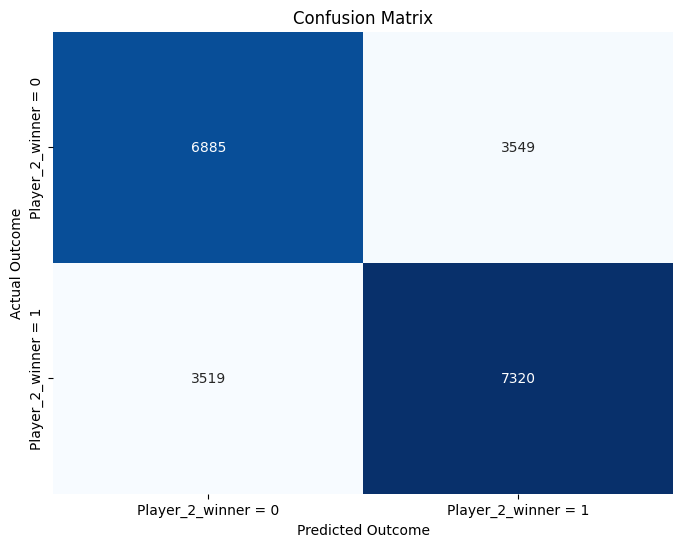

In [510]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Player_2_winner = 0', 'Player_2_winner = 1'],
            yticklabels=['Player_2_winner = 0', 'Player_2_winner = 1'])
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.title('Confusion Matrix')
plt.show()

In [511]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70910 entries, 0 to 71212
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   player_1_id                                70910 non-null  int64  
 1   player_2_id                                70910 non-null  int64  
 2   ranking_difference                         70910 non-null  float64
 3   player_1_surface_cum_win_percentage        70910 non-null  float64
 4   player_2_surface_cum_win_percentage        70910 non-null  float64
 5   player_1_tourney_level_cum_win_percentage  70910 non-null  float64
 6   player_2_tourney_level_cum_win_percentage  70910 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 6.3 MB


In [512]:
y

0         True
1         True
2        False
3         True
4        False
         ...  
71208    False
71209    False
71210     True
71211     True
71212     True
Name: winner_player_2, Length: 70910, dtype: bool

### Random Forest Model

In [513]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Model with cross validation
forest = RandomForestClassifier(max_depth=1, max_features = 16, min_samples_leaf = 1, min_samples_split = 2,  random_state=1)

# Create Train Data
X = train.drop("winner_player_2", axis=1)
y = train["winner_player_2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# fit model
forest.fit(X_train, y_train)

#make prediction
y_pred = forest.predict(X_test)

# get prediction probabilities
forest.predict_proba(X_test)

# Evaluate Model Performance - accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.664


#### Determine Variable Importances

In [516]:
def plot_variable_importance(model, X_train):
  importances = pd.Series(data=model.feature_importances_,
                          index=X_train.columns)
  importances.sort_values().plot(kind='barh', color="#00802F")
  plt.title('Features Importances')

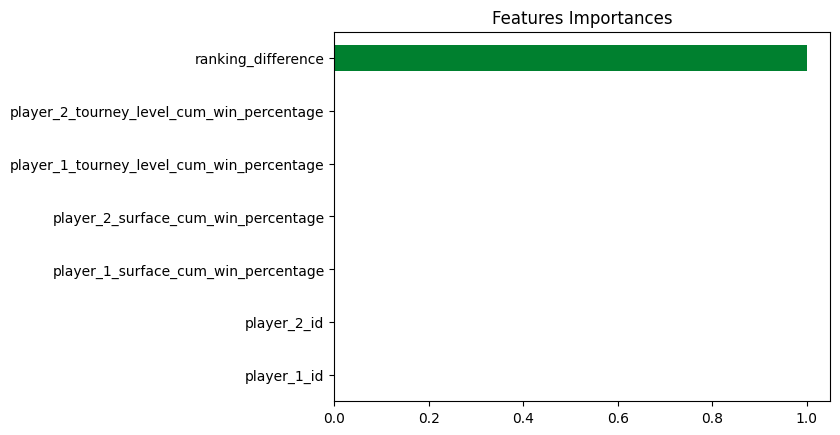

In [517]:
plot_variable_importance(forest, X_train)

#### Implementation Help for Grid Search


In [312]:
# use this when looking for the best combination of hyperparamers. 
# the below example serves the purpose of a cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# hyperparameters for GridSearchCV
parameters = {
            "max_features": [8, 16],
            'max_depth': range(1,2),
            "min_samples_split": [2, 3, 5], 
            'min_samples_leaf': [1, 10, 20]
            }

# make a scoring function for accuracy
acc_score = make_scorer(accuracy_score, greater_is_better=True)

# fit model
model_CV = GridSearchCV(forest, parameters, scoring=acc_score, cv=5,verbose=3) # Apply 5 Cross Validiation Folds to find best hyperparameters
model_CV.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s


[CV 1/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2;, score=0.664 total time=   2.3s
[CV 2/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2;, score=0.658 total time=   2.4s
[CV 3/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2;, score=0.658 total time=   2.7s
[CV 4/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2;, score=0.647 total time=   2.8s
[CV 5/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2;, score=0.659 total time=   2.2s
[CV 1/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=3;, score=0.664 total time=   2.5s
[CV 2/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=3;, score=0.658 total time=   2.1s
[CV 3/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=3;, score=0.658 total time=   2.3s
[CV 4/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=

/home/jean/Documents/dev/cas-project/venv_proj/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jean/Documents/dev/cas-project/venv_proj/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jean/Documents/dev/cas-project/venv_proj/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/jean/Documents/dev/cas-project/venv_proj/lib/python3.10/site-packages/sk

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=1, max_features=16,
                                              random_state=1),
             param_grid={'max_depth': range(1, 2), 'max_features': [8, 16],
                         'min_samples_leaf': [1, 10, 20],
                         'min_samples_split': [1, 2, 3, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [313]:
model_CV.best_params_

{'max_depth': 1,
 'max_features': 16,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Gradient Booster Tree Model

In [518]:
from sklearn.ensemble import GradientBoostingClassifier

boostedtrees = GradientBoostingClassifier(max_depth= 2, max_features = 8, min_samples_leaf = 5, min_samples_split = 5, n_estimators = 1000, 
                                        random_state=1)

# Create Train Data
X = train.drop("winner_player_2", axis=1)
y = train["winner_player_2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# fit model
boostedtrees.fit(X_train, y_train)

#make prediction
y_pred = boostedtrees.predict(X_test)

# get prediction probabilities
print(boostedtrees.predict_proba(X_test))

accuracy_score(y_test, y_pred)

[[0.3577226  0.6422774 ]
 [0.39140984 0.60859016]
 [0.22554186 0.77445814]
 ...
 [0.90172702 0.09827298]
 [0.42990413 0.57009587]
 [0.50320887 0.49679113]]


0.6739999059841113

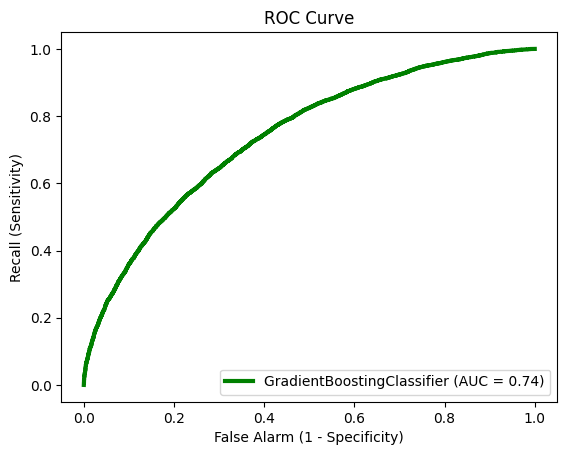

In [519]:
plot_ROC(boostedtrees, X_test, y_test)

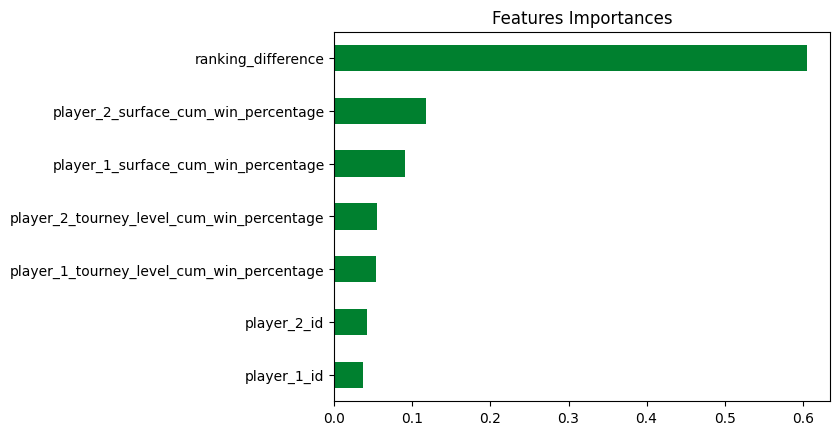

In [520]:
plot_variable_importance(boostedtrees, X_train)

#### Implementation Help for Grid Search


In [326]:
# use this when looking for the best combination of hyperparamers. 
# the below example serves the purpose of a cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# hyperparameters for GridSearchCV
parameters = {
            "max_features": [8],
            'max_depth': [1, 2, 4],
            "min_samples_split": [5], 
            'min_samples_leaf': [1, 5, 10],
            'n_estimators': [1000]
            }

# make a scoring function for accuracy
acc_score = make_scorer(accuracy_score, greater_is_better=True)

# fit model
model_CV = GridSearchCV(boostedtrees, parameters, scoring=acc_score, cv=5,verbose=3) # Apply 5 Cross Validiation Folds to find best hyperparameters
model_CV.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.680 total time=  24.7s
[CV 2/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.674 total time=  26.8s
[CV 3/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.678 total time=  28.7s
[CV 4/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.667 total time=  31.1s
[CV 5/5] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.674 total time=  25.2s
[CV 1/5] END max_depth=1, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.680 total time=  26.8s
[CV 2/5] END max_depth=1, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.674 total time=  23.8s
[C

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'max_depth': [1, 2, 4], 'max_features': [8],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [5], 'n_estimators': [1000]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [327]:
model_CV.best_params_

{'max_depth': 2,
 'max_features': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 1000}

## Final Conclusion  <a name="final-concl"></a>

...